In [1]:
# Importing libraries
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
import pymaster as nmt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower, correlations
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.5 installed at /home/akozameh/miniconda3/envs/CMB/lib/python3.10/site-packages/camb


In [46]:
#Calculate results for specified parameters and return CAMBdata instance for getting results.
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.66, ombh2=0.02242, omch2=0.11933, mnu=0.06, omk=0.001, tau=0.0561)
pars.InitPower.set_params(As=2.105e-9, ns=0.9665, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [47]:
#calculate results for these parameters
results = camb.get_results(pars)

In [48]:
#Set all CAMB parameters at once, including parameters which are part of the CAMBparams structure, as well as global parameters.
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


In [49]:
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])

(2551, 4)


In [4]:
import psutil

In [5]:
#Read the map
Planck_SMICA=hp.read_map('/home/akozameh/COM_CMB_IQU-smica_2048_R3.00_hm2.fits')
process = psutil.Process()
print(process.memory_info().rss)  # in bytes 

358506496


In [6]:
Planck_SMICA_out=hp.ud_grade(Planck_SMICA,1024)

In [7]:
Planck_SMICA_out
process = psutil.Process()
print(process.memory_info().rss)  # in bytes 

419696640


In [8]:
Planck_SMICA_out_2=hp.ud_grade(Planck_SMICA,512)
process = psutil.Process()
print(process.memory_info().rss)  # in bytes 

444862464


Text(0.5, 1.0, 'Memory usage for CMB map at three different resolution')

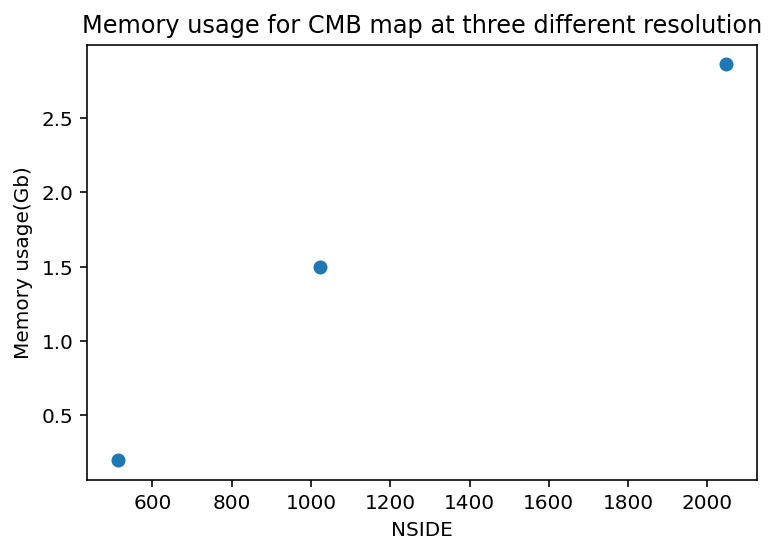

In [14]:
memory_usage=[0.20,1.50,2.86]
nside=[512,1024,2048]
plt.scatter(nside,memory_usage)
plt.xlabel('NSIDE')
plt.ylabel('Memory usage(Gb)')
plt.title('Memory usage for CMB map at three different resolution')

In [34]:
#Read the mask
mask=hp.read_map('/home/akozameh/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits')

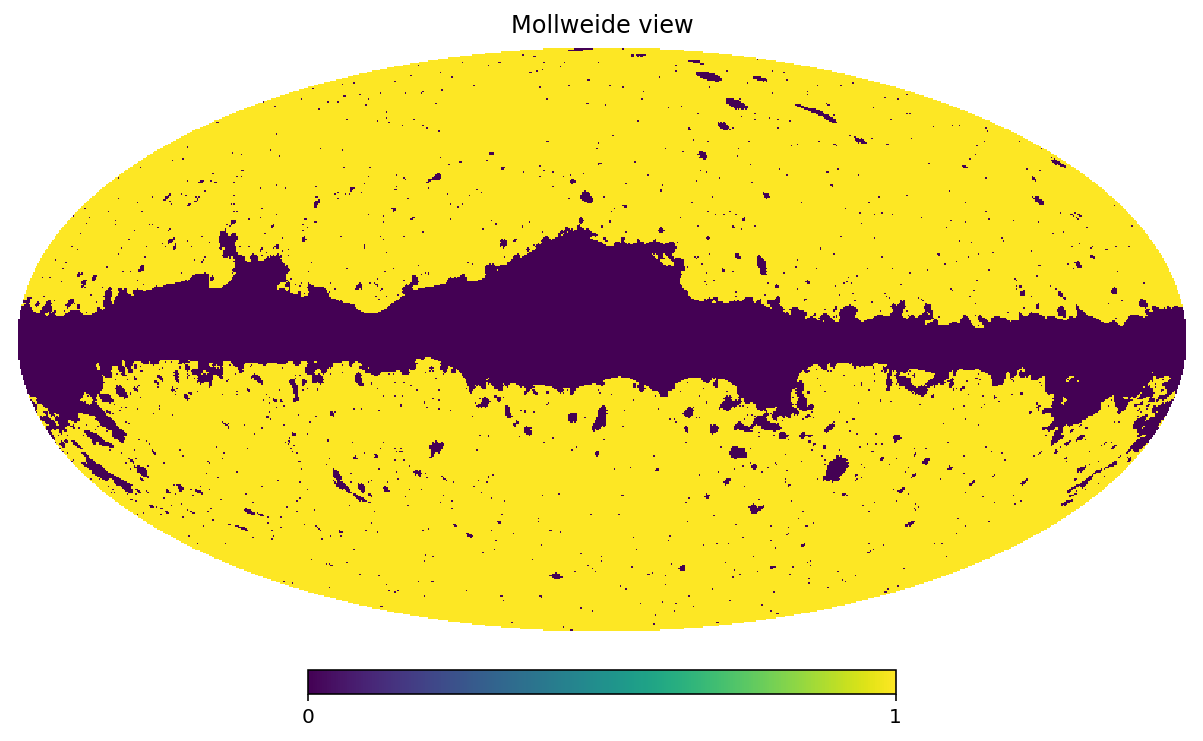

In [35]:
hp.mollview(mask)

Since we are interested in large-angular scale, the maps were degraded at NSIDE = 64 and NSIDE=

In [27]:
mask_1=hp.pixelfunc.ud_grade(mask,64)                #degraded mask at NSIDE=64

In [12]:
#Planck SMICA degraded map
Planck_1=hp.pixelfunc.ud_grade(Planck_SMICA, 64)       #degraded maps at NSIDE=64
#Planck_2=hp.pixelfunc.ud_grade(Planck_SMICA, 4)       #degraded maps at NSIDE=32


In [13]:
# Creating new mask in equatorial coordinates
NSIDE = 64
ipix=hp.nside2npix(NSIDE)
m=np.zeros(ipix) #mask


type(ipix)

int

In [14]:
# I make a list of thetas and phi 
thetas=[]
phis=[]
for j in range(0,(ipix)):
    theta,phi=(hp.pix2ang(NSIDE, j))
    thetas.append(theta)
    phis.append(phi)


In [15]:
# it makes theta and phi array by numpy array
theta_a=np.array(thetas)
phis_a=np.array(phis)

In [16]:
# Converting the theta, phi in r.a and decl.
decl=np.rad2deg(0.5 * np.pi - theta_a)
ra = np.rad2deg(phis_a)

In [17]:
cond1 = decl>-70
cond2 = decl<30
mask  = cond1 & cond2

In [18]:
type(mask)

numpy.ndarray

In [19]:
# Convert the decl and r.a in theta and phi
theta = 0.5 * np.pi - np.deg2rad(decl[mask])
phi = np.deg2rad(ra[mask])


In [20]:
# It Converts theta and phi in number of pixeles
pix=hp.ang2pix(NSIDE,theta,phi)
pix

array([12160, 12161, 12162, ..., 47637, 47638, 47639])

In [21]:
m[pix]=1

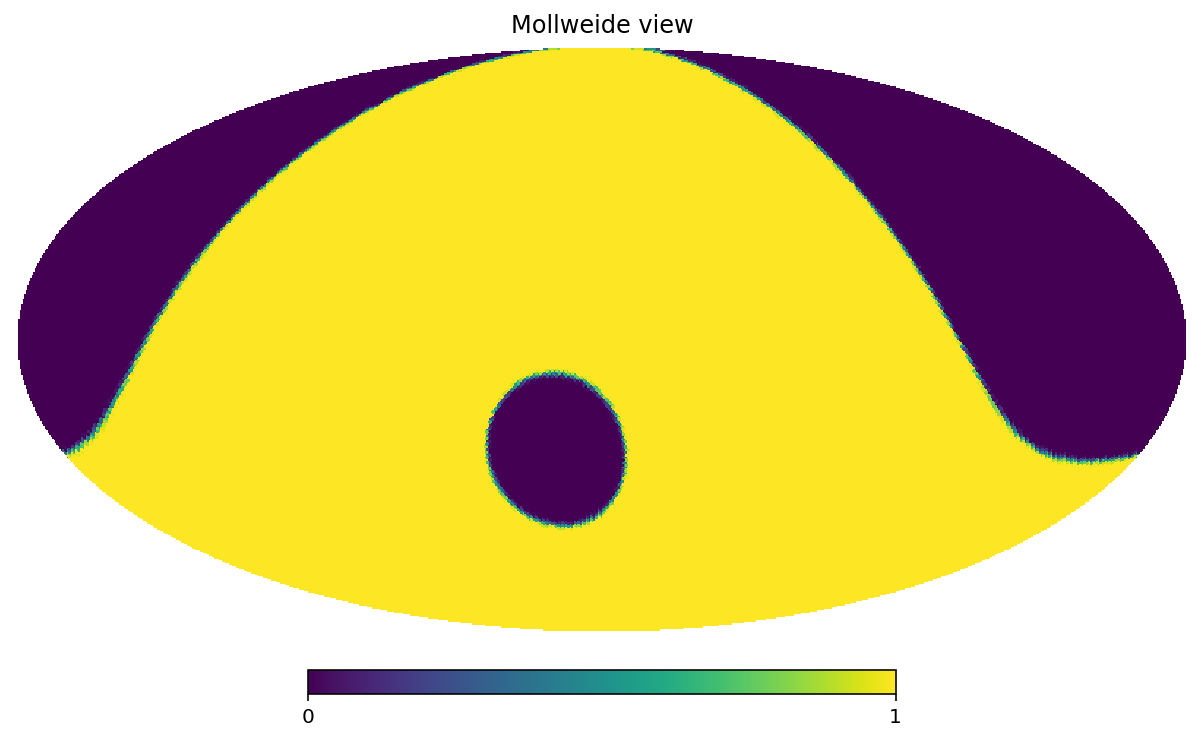

In [37]:
hp.mollview(m)

In [38]:
rot=hp.Rotator(coord=['C','G'])  # Transforms equatorial to galactic coordinates

In [31]:
# Rotate the map to galactic coordinates
m=rot.rotate_map_pixel(m) 

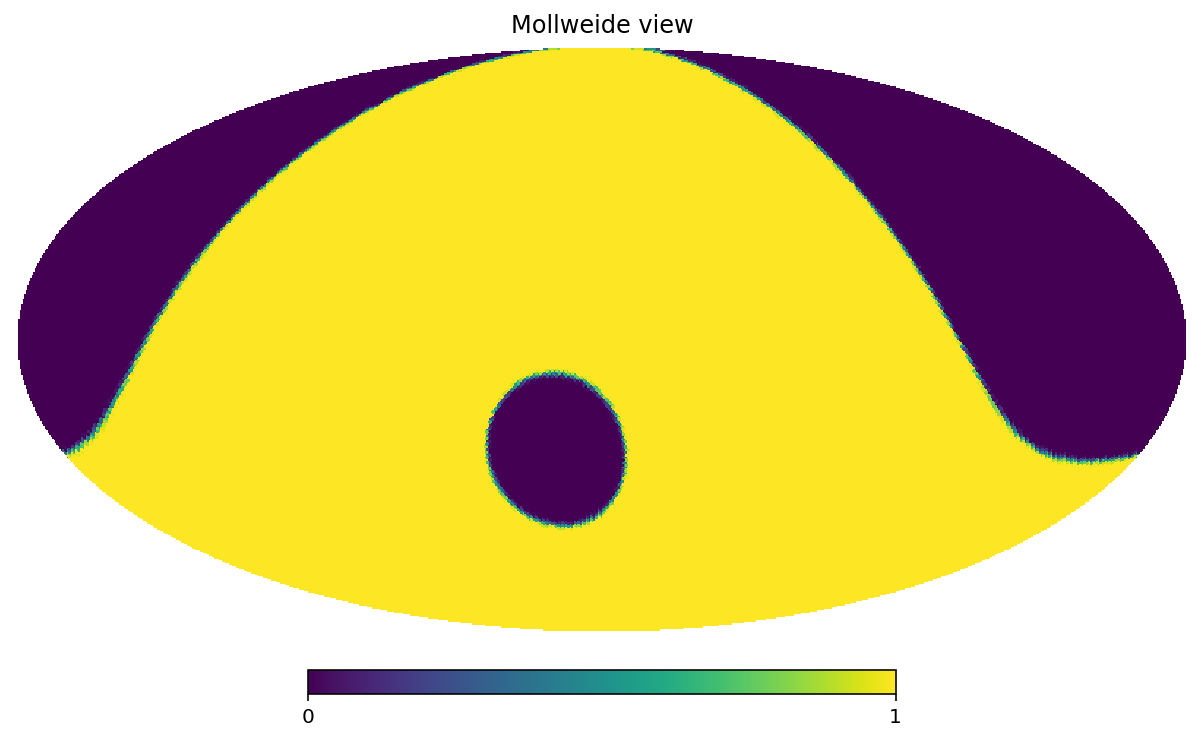

In [32]:
hp.mollview(m)

In [28]:
# Total mask
mask_total_1=m * mask_1

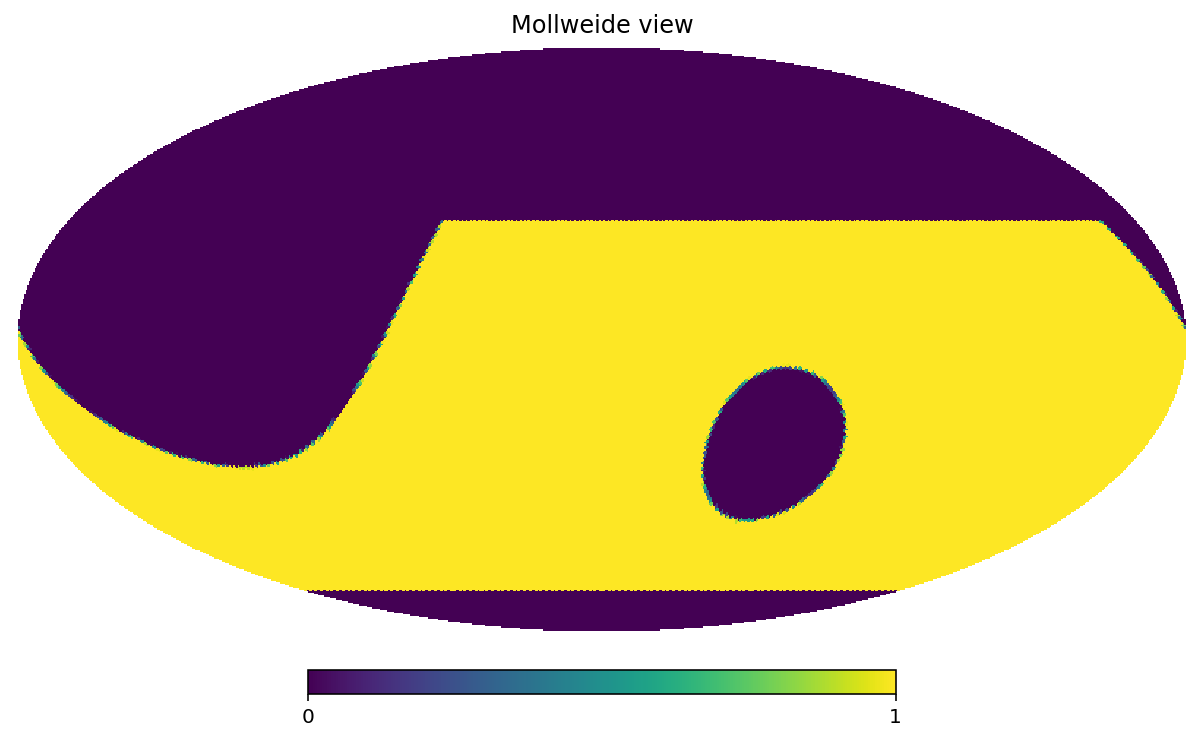

In [29]:
# Total mask is shown
hp.mollview(mask_total_1)

In [91]:
mask_total_1=hp.pixelfunc.ud_grade(mask,32)                #degraded mask at NSIDE=32

In [36]:
# Saving the mask and map
hp.fitsfunc.write_map('/home/akozameh/reMASTERed/mask_total_1.fits', mask_total_1, overwrite=True)
hp.fitsfunc.write_map('/home/akozameh/reMASTERed/Planck_2.fits',Planck_2, overwrite= True)

setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float32')]


In [108]:
result=np.load('/home/akozameh/cmblss/code/remastered_curves.p', allow_pickle=True)

In [109]:
l=range(result[0].shape[0])

In [110]:
ele=np.arange(len(result[0]))
ele

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75])

In [111]:
el=np.arange(1,result[0].shape[0]+1)
el

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76])

In [112]:
(result[0]-result[1])/result[0]

array([0.90873714, 0.99567751, 0.99686671, 1.00181703, 0.99699406,
       1.00138925, 1.00006601, 1.00465384, 0.99861897, 0.99906466,
       0.99703942, 1.00009241, 0.99996205, 1.00102614, 0.99984263,
       1.00130974, 0.99958059, 1.00161184, 0.99756484, 1.00039954,
       0.99775559, 1.00199045, 0.99845043, 1.00114915, 1.0000901 ,
       1.00144942, 0.99991261, 0.99943188, 0.99971871, 1.00018619,
       0.99980021, 0.99931794, 0.99951262, 1.00004653, 0.99989759,
       0.99963754, 1.00019038, 1.00008636, 1.00051397, 0.99953908,
       1.00048916, 0.99967357, 1.00025229, 0.99917335, 1.00016486,
       1.00001477, 1.00030792, 1.00008755, 0.99997532, 0.99989535,
       0.99979706, 1.00002232, 1.00040061, 1.00002643, 1.0004623 ,
       0.99965214, 1.00041345, 0.99955843, 1.00033509, 0.9993048 ,
       0.9998186 , 0.99955342, 1.0000666 , 1.00021958, 0.99995547,
       1.00014185, 1.00002292, 1.00040196, 0.99998549, 1.0000272 ,
       0.99968145, 1.00009514, 0.99982433, 1.00006491, 0.99974

In [102]:
result[0]

array([2.41610964e-11, 3.66618607e-11, 1.53541617e-10, 2.94161867e-10,
       1.63715134e-10, 1.96039134e-10, 7.55906259e-11, 8.41557523e-11,
       4.52475600e-11, 3.70617823e-11, 3.80378423e-11, 3.15019768e-11,
       2.39851924e-11, 1.93610684e-11, 1.78788510e-11, 1.53801764e-11,
       1.18589753e-11, 1.25289668e-11, 9.42517050e-12, 1.02918330e-11,
       7.85439161e-12, 6.54836956e-12, 5.64039290e-12, 5.83310587e-12,
       5.85021201e-12, 5.99049751e-12, 5.95087456e-12, 4.87210605e-12,
       5.87163325e-12, 5.33563780e-12, 4.49366380e-12, 4.07913353e-12,
       5.29744462e-12, 3.68132683e-12, 3.98728222e-12, 3.26267575e-12,
       3.59962876e-12, 4.00072680e-12, 3.68432341e-12, 3.38192380e-12,
       4.27480479e-12, 2.82283413e-12, 2.85906673e-12, 2.80414058e-12,
       2.47622870e-12, 2.27539757e-12, 2.29265999e-12, 2.63555280e-12,
       1.88607194e-12, 2.47405423e-12, 2.30910388e-12, 1.99252866e-12,
       1.97044560e-12, 1.70652764e-12, 1.74630779e-12, 1.78821492e-12,
      

In [103]:
result[1]

array([ 2.20501087e-12,  1.58470594e-13,  4.81089768e-13, -5.34500731e-13,
        4.92117088e-13, -2.72347523e-13, -4.98955009e-15, -3.91647285e-13,
        6.24880329e-14,  3.46653556e-14,  1.12613920e-13, -2.91095587e-15,
        9.10138913e-16, -1.98672365e-14,  2.81353944e-15, -2.01440533e-14,
        4.97382929e-15, -2.01946524e-14,  2.29518135e-14, -4.11199017e-15,
        1.76284969e-14, -1.30341803e-14,  8.74016941e-15, -6.70309942e-15,
       -5.27115639e-16, -8.68277667e-15,  5.20075372e-16,  2.76791798e-15,
        1.65161370e-15, -9.93450046e-16,  8.97775031e-16,  2.78219589e-15,
        2.58186797e-15, -1.71309588e-16,  4.08322810e-16,  1.18257410e-15,
       -6.85299345e-16, -3.45504089e-16, -1.89363511e-15,  1.55879707e-15,
       -2.09104916e-15,  9.21449818e-16, -7.21312282e-16,  2.31803453e-15,
       -4.08230401e-16, -3.36119918e-17, -7.05955614e-16, -2.30746316e-16,
        4.65452268e-17,  2.58920210e-16,  4.68599860e-16, -4.44799130e-17,
       -7.89376929e-16, -

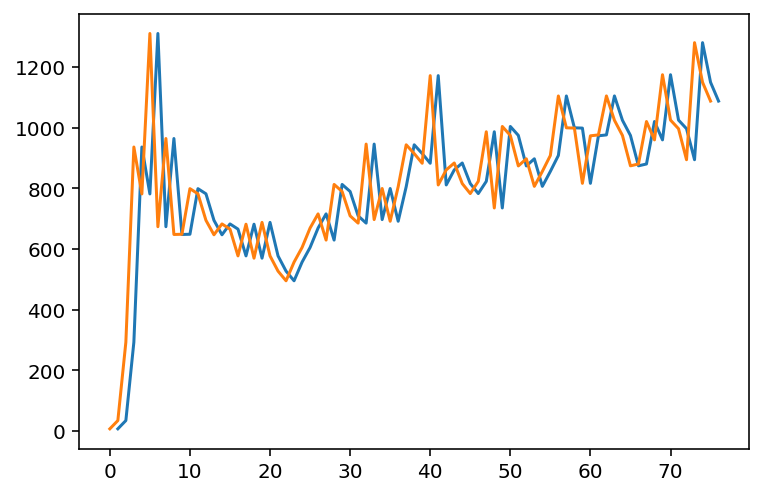

In [104]:
plt.plot(el,result[0]*(1e12)*el*(el+1)/2/np.pi)
plt.plot(ele,result[0]*(1e12)*el*(el+1)/2/np.pi)
#plt.plot(el,result[1]*(1e12)*el*(el+1)/2/np.pi)

# I compute  the cls with anafast to validate our results

In [105]:
Cl = hp.anafast(Planck_2, lmax= 75)

In [106]:
l = np.arange(len(Cl))

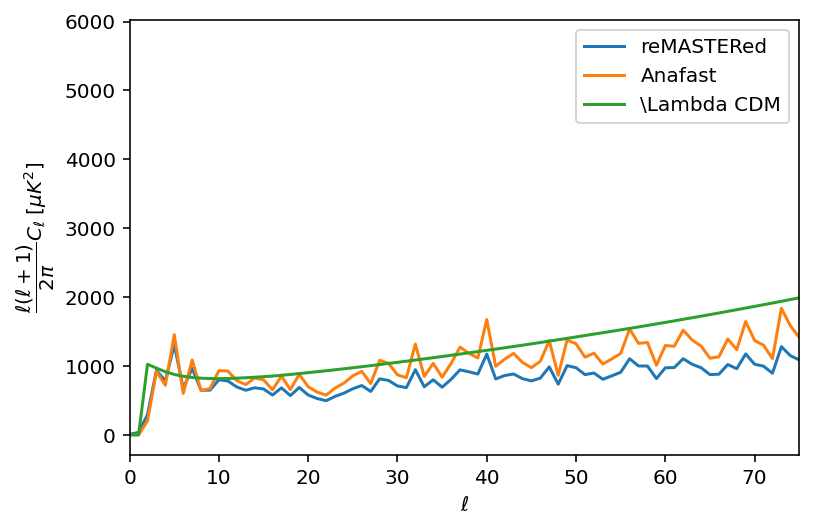

In [107]:
plt.plot(ele,result[0]*(1e12)*el*(el+1)/2/np.pi, label='reMASTERed')
plt.plot(l, Cl*(1e12)*l*(l+1)/2/np.pi, label='Anafast')
plt.plot(ls,totCL[:,0], label=r'\Lambda CDM')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.xlabel("$\ell$")
plt.xlim(0,75)
plt.legend()

# In this part I will compute the  pseudo cls with namaster

In [70]:
# An NmtField object contains all the information describing the fields to correlate, 
# including their observed maps, masks and contaminant templates.
f_0=nmt.NmtField(mask_total, [Planck_2])

In [71]:
# Initialize binning scheme with 4 ells per bandpower
# Convenience constructor for HEALPix maps with linear binning.
b = nmt.NmtBin.from_nside_linear(32, 4)

In [72]:
# Compute MASTER estimator
# spin-0 x spin-0
#Computes the full MASTER estimate of the power spectrum of two fields (f1 and f2). 
cl_00 = nmt.compute_full_master(f_0, f_0, b)

In [73]:
# Shape of the pseudo Cls
cl_00.shape


(1, 23)

In [74]:
#Returns an array with the effective multipole associated to each bandpower. 
#These are computed as a weighted average of the multipoles within each bandpower.
el_1 = b.get_effective_ells()
el_1.shape

(23,)

In [75]:
dl=cl_00[0]*[(1e6)**(2)]*el_1*(el_1+1)/2/np.pi

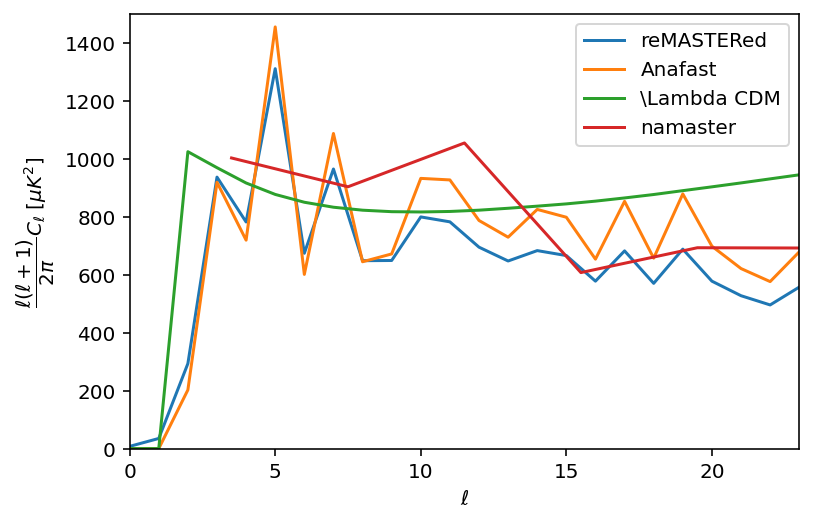

In [78]:
plt.plot(ele,result[0]*(1e12)*el*(el+1)/2/np.pi, label='reMASTERed')
plt.plot(l, Cl*(1e12)*l*(l+1)/2/np.pi, label='Anafast')
plt.plot(ls,totCL[:,0], label=r'\Lambda CDM')
plt.plot(el_1, dl, label='namaster')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.xlabel("$\ell$")
plt.xlim(0,23)
plt.ylim(0,1500)
plt.legend()

In [31]:
# Interpolation of the pseudo Dls
from scipy.interpolate import interp1d

In [32]:
# I define the interpolation with x**3
f=interp1d(el, dl, kind='cubic') 

In [33]:
# I define my news l
lnew=np.linspace(4, 47, 47)
# oncatenate

In [34]:
#pdl is the interpolation of the pseudo Dls
pdl_int=f(lnew)

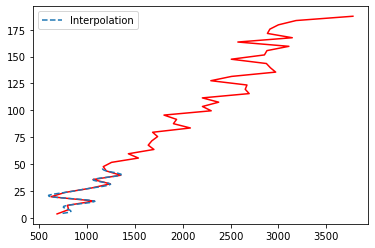

In [35]:
plt.plot(dl,el,'r')
plt.plot(pdl_int, lnew,'--', label='Interpolation')
plt.legend()

In [36]:
# Concatenate the ls
ljoin=np.concatenate((([0,0,2,3]),lnew))
# Concatenate the pseudo Dls
pDl_=np.concatenate((([0.0,0.0,203.36331868506028,918.9783866182479]),pdl_int ))

In [37]:
# pDl_ is may new array
pDl_.shape

(51,)

In [38]:
dl_1=np.ones((len(dl),4))
dl_1[:,0]=dl
dl_1.shape

(47, 4)

In [39]:
Dl=np.ones((len(pDl_),4))
Dl[:,0]=pDl_
Dl.shape

(51, 4)

In [40]:
# In this part I compute the correlation function 
# Importing libraries
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os

In [41]:
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower, correlations
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.5 installed at /home/akozameh/miniconda3/envs/CMB/lib/python3.10/site-packages/camb


In [42]:
corr1, xvals_1, weights = correlations.gauss_legendre_correlation(Dl)
corr2, xvals_2, weights2 = correlations.gauss_legendre_correlation(dl_1)
#xvals2=np.linspace(-1,1,2502)
r1=np.arccos(xvals_1)*180/np.pi # sampled theta values in degrees
r2=np.arccos(xvals_2)*180/np.pi

In [58]:
r1

array([177.32457883, 173.85879211, 170.37253819, 166.88166006,
       163.38902807, 159.89554763, 156.40159331, 152.90734782,
       149.41291088, 145.91834151, 142.42367691, 138.92894168,
       135.43415276, 131.93932225, 128.44445899, 124.94956963,
       121.45465932, 117.95973207, 114.46479112, 110.9698391 ,
       107.47487824, 103.97991041, 100.48493726,  96.98996025,
        93.49498074,  90.        ,  86.50501926,  83.01003975,
        79.51506274,  76.02008959,  72.52512176,  69.0301609 ,
        65.53520888,  62.04026793,  58.54534068,  55.05043037,
        51.55554101,  48.06067775,  44.56584724,  41.07105832,
        37.57632309,  34.08165849,  30.58708912,  27.09265218,
        23.59840669,  20.10445237,  16.61097193,  13.11833994,
         9.62746181,   6.14120789,   2.67542117])

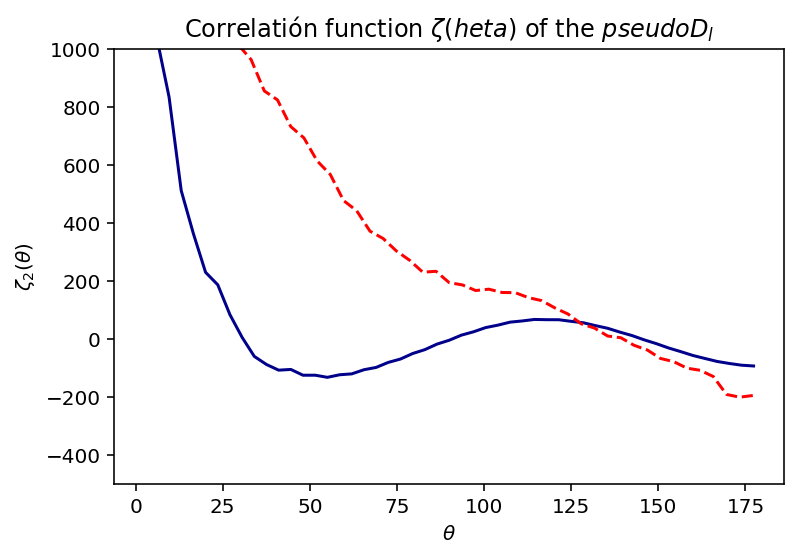

In [43]:
plt.plot(r1, corr1[:,0], color = 'darkblue')
plt.plot(r2,corr2[:,0],'--', color='red')
plt.ylabel(r'$\zeta_{2}(\theta)$')
plt.xlabel(r'$\theta$')
plt.title('Correlatión function $\zeta (\theta)$ of the $pseudo D_{l}$')
plt.ylim(-500,1000)
plt.show()

In [44]:
# In this part I create the python array to repdroduce the schi data
d=[] # I make a list
d=np.array(d)

In [45]:
print('the original array is:')
print(d)
print('------------------')

the original array is:
[]
------------------


In [59]:
# adding new colums
d_array=np.loadtxt('/home/akozameh/cmblss/data/schi.csv', delimiter=',')
d_array.shape

(39, 2)

In [64]:
# I delete the last component because is out of range
d1=np.delete(d_array,38,0)
d1.shape

(38, 2)

In [68]:
d1


array([[ 5.42600e+00,  9.84030e+02],
       [ 7.02100e+00,  9.14829e+02],
       [ 8.29800e+00,  8.34981e+02],
       [ 9.57400e+00,  7.55133e+02],
       [ 1.14890e+01,  6.06084e+02],
       [ 1.46810e+01,  4.41065e+02],
       [ 1.65960e+01,  3.66540e+02],
       [ 1.91490e+01,  2.12167e+02],
       [ 2.04260e+01,  1.37643e+02],
       [ 2.48940e+01,  2.05320e+01],
       [ 2.74470e+01, -3.27000e+01],
       [ 3.12770e+01, -6.99620e+01],
       [ 3.44680e+01, -9.12550e+01],
       [ 4.21280e+01, -9.65780e+01],
       [ 4.72340e+01, -1.12548e+02],
       [ 5.36170e+01, -1.17871e+02],
       [ 6.06380e+01, -9.12550e+01],
       [ 6.51060e+01, -6.46390e+01],
       [ 6.82980e+01, -2.73760e+01],
       [ 7.46810e+01,  1.52090e+01],
       [ 7.97870e+01,  1.52090e+01],
       [ 8.36170e+01, -7.60000e-01],
       [ 8.61700e+01, -1.14070e+01],
       [ 9.12770e+01, -2.20530e+01],
       [ 9.51060e+01, -2.73760e+01],
       [ 1.02128e+02, -7.60000e-01],
       [ 1.07234e+02,  3.11790e+01],
 

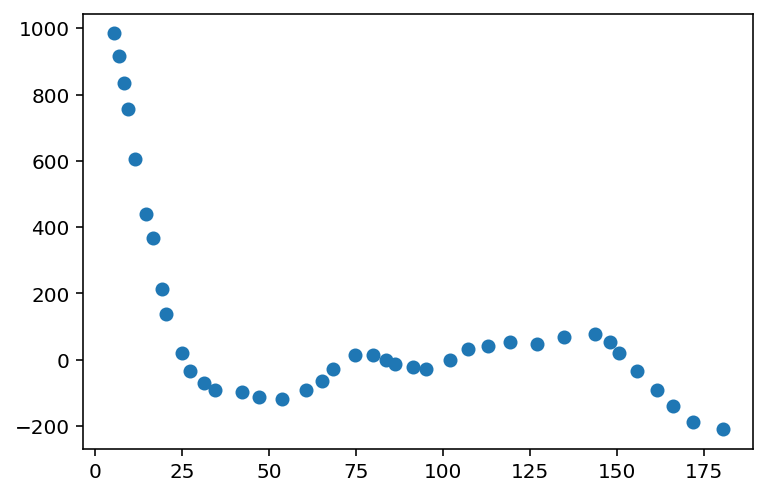

In [47]:
plt.scatter(d_array[:,0], d_array[:,1], label='schi et al. (2023)')

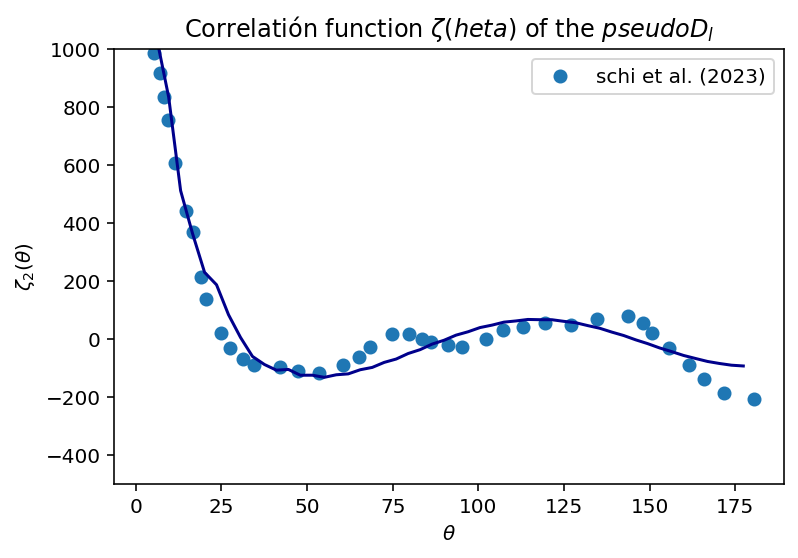

In [50]:
plt.plot(r1, corr1[:,0], color = 'darkblue')
plt.scatter(d_array[:,0], d_array[:,1], label='schi et al. (2023)')
plt.ylabel(r'$\zeta_{2}(\theta)$')
plt.xlabel(r'$\theta$')
plt.title('Correlatión function $\zeta (\theta)$ of the $pseudo D_{l}$')
plt.ylim(-500,1000)
plt.legend()
plt.show()


In [55]:
# I define a new interpolation with x**3
f1=interp1d(r1, corr1[:,0] , kind='cubic') 

In [67]:
# I define my news thetas anc c_theta
theta_1=d1
c_theta=f1(d1)

ValueError: A value in x_new is below the interpolation range.